# Linear regression (multiple)

In [6]:
# load the data
import pandas as pd

df = pd.read_table("/Users/davidtbo/Documents/Data_Science/99_Data/eucalyptus.txt", sep=" ")

In [7]:
df.head()

,ht,circ,bloc
0,18.25,36,A1
1,19.75,42,A1
2,16.50,33,A1
3,18.25,39,A1
4,19.50,43,A1


In [8]:
df.columns

Index(['ht', 'circ', 'bloc'], dtype='object')

In [18]:
df.shape

(1429, 3)

In [9]:
df.describe(include='all')

,ht,circ,bloc
count,1429.000000,1429.000000,1429
unique,NaN,NaN,3
top,NaN,NaN,A2
freq,NaN,NaN,586
mean,21.212386,47.347796,NaN
std,2.490516,8.489743,NaN
min,11.250000,26.000000,NaN
25%,19.750000,42.000000,NaN
50%,21.750000,48.000000,NaN
75%,23.000000,54.000000,NaN


In [19]:
import matplotlib.pyplot as plt

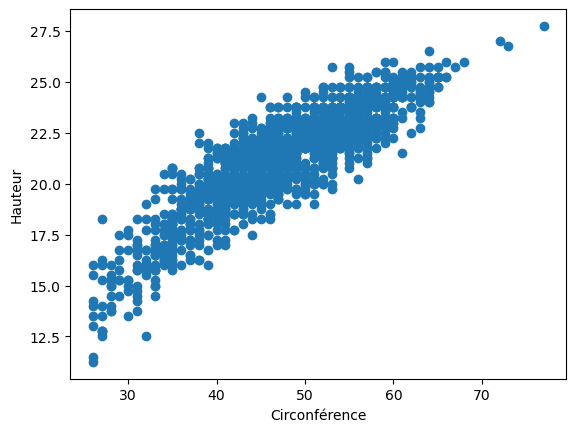

In [20]:
# Create a scatter plot (nuage de points)
plt.plot(df["circ"], df["ht"], "o")

# Define the labels
plt.xlabel("Circonférence")
plt.ylabel("Hauteur")

# Display the graph
plt.show()

In [21]:
import numpy as np

from statsmodels.formula.api import ols

# Assuming your data is stored in a pandas DataFrame named 'euca'
model1 = ols('ht ~ circ', data=df).fit()

# Print the model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                     ht   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4732.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:08:05   Log-Likelihood:                -2286.2
No. Observations:                1429   AIC:                             4576.
Df Residuals:                    1427   BIC:                             4587.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0375      0.180     50.264      0.0

In [24]:

# Extract regression coefficients
intercept = model1.params[0]
slope = model1.params[1]

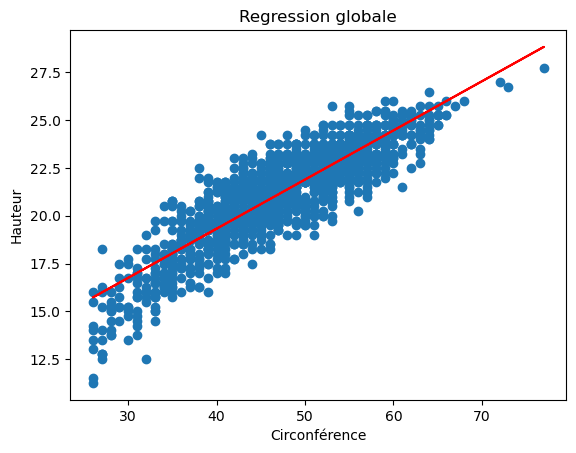

In [28]:
# Data Visualization:

# Add regression line to the plot
plt.plot(df["circ"], df["ht"], "o")
plt.plot(df["circ"], intercept + slope * df["circ"], "-r")

# Customize the plot
plt.xlabel("Circonférence")
plt.ylabel("Hauteur")
plt.title("Regression globale")

# Show the plot
plt.show()

In [30]:
# Model 2: ht ~ circ + I(sqrt(circ))
model2 = ols('ht ~ circ + I(np.sqrt(circ))', data=df).fit()

# Print model summaries
print("Model 2 summary:")
print(model2.summary())

Model 2 summary:
                            OLS Regression Results                            
Dep. Variable:                     ht   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     2718.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:17:44   Log-Likelihood:                -2208.5
No. Observations:                1429   AIC:                             4423.
Df Residuals:                    1426   BIC:                             4439.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -24.

In [31]:
# Model 3: ht ~ I(sqrt(circ))
model3 = ols('ht ~ I(np.sqrt(circ))', data=df).fit()

# Print model summaries
print("Model 3 summary:")
print(model3.summary())

Model 3 summary:
                            OLS Regression Results                            
Dep. Variable:                     ht   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     5121.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:18:04   Log-Likelihood:                -2242.5
No. Observations:                1429   AIC:                             4489.
Df Residuals:                    1427   BIC:                             4500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.

In [33]:
import statsmodels.api as sm

anova_result = sm.stats.anova_lm(model1, type=2)
print(anova_result)

              df       sum_sq      mean_sq            F  PR(>F)
circ         1.0  6805.331791  6805.331791  4732.364074     0.0
Residual  1427.0  2052.083972     1.438041          NaN     NaN


In [37]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                     ht   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4732.
Date:                Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:37:46   Log-Likelihood:                -2286.2
No. Observations:                1429   AIC:                             4576.
Df Residuals:                    1427   BIC:                             4587.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0375      0.180     50.264      0.0

In [38]:

# Create new data frame with prediction range
xnew = pd.DataFrame({'circ': np.linspace(df['circ'].min(), df['circ'].max(), 1000)})


In [47]:
xnew.head()

,circ
0,26.000000
1,26.051051
2,26.102102
3,26.153153
4,26.204204


In [39]:

# Generate predictions with confidence intervals
ICpred = pd.DataFrame(model1.get_prediction(xnew).summary_frame(alpha=0.05))


In [40]:
ICpred.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,15.723060,0.085870,15.554614,15.891505,13.364685,18.081434
1,15.736187,0.085693,15.568089,15.904285,13.377837,18.094537
2,15.749314,0.085516,15.581564,15.917064,13.390989,18.107639
3,15.762441,0.085339,15.595039,15.929844,13.404141,18.120742
4,15.775569,0.085161,15.608514,15.942623,13.417293,18.133844


In [46]:

# Combine predictions and new data
res_pred = pd.concat([ICpred, xnew], axis=1)

print(res_pred.head().to_string())

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper       circ
0  15.723060  0.085870      15.554614      15.891505     13.364685     18.081434  26.000000
1  15.736187  0.085693      15.568089      15.904285     13.377837     18.094537  26.051051
2  15.749314  0.085516      15.581564      15.917064     13.390989     18.107639  26.102102
3  15.762441  0.085339      15.595039      15.929844     13.404141     18.120742  26.153153
4  15.775569  0.085161      15.608514      15.942623     13.417293     18.133844  26.204204


Exercice
1. Charger le fichier "jouet1.txt" dans un dataframe nommé jouet1. Au vu du graphique de y contre x, une régression linéaire vous semble-t-elle indiquée ?  
2. Faire la régression de y sur x et mettre le résultat dans un objet nommé reg. Afficher le résumé des résultats. Le résultat confirme-t-il la réponse à la question 1 ?  
3. Afficher le graphique des résidus εˆ contre les valeurs ajustées yˆ . ii
Que penser de ce graphique au vu de ce que l’on sait sur ces deux quantités ?  
4. Afficher le graphique des résidus contre x. Identifier le problème.